# **Spatial Data**

In [159]:
import pandas as pd
import numpy as np 
import geopandas 
import matplotlib.pyplot as plt           
import pandas as pd     
import json 
import requests
import overpy
from tqdm import tqdm
from multiprocessing.dummy import Pool

- The most reliable Python library to manage spatial data is geopandas. Unfortunately, the instalation of geopandas is not as trivial as the other Python librarys we have seen. For this reason, I leave a blog with a simple way of installing [geopandas](https://medium.com/analytics-vidhya/fastest-way-to-install-geopandas-in-jupyter-notebook-on-windows-8f734e11fa2b)

In [160]:
import geopandas

- Let´s look at some examples of how we can use geopandas, applied to a spatial data set of the neighborhoods in Bogotá. [You can find this data and other fun data sets here](https://sites.google.com/site/seriescol/shapes)

- [Geopandas](https://geopandas.org/docs/user_guide/data_structures.html), as many other many other similar librarys has three basic classes of geometric objects: 
1. Points
2. lines
3. Polygons

In [165]:
upz=geopandas.read_file('upz.zip')
upz=upz.to_crs(epsg=4326)

In [162]:
upz

,NUMERO,NOMBRE,CLASIFICAC,TIPO_UPZ,DESC_TIPO,NLOCALIDAD,LOCALIDAD,ESTRATOS,COD_ESTRAT,AREA,PERIMETER,HECTARES,geometry
0,117,AEROPUERTO EL DORADO,h,8,PREDOMINANTEMENTE DOTACIONAL,9,FONTIBON,ESTRATOS 1 Y 2,2,7425599.827,15029.408,742.560,"POLYGON ((-74.15552 4.71760, -74.15552 4.71760..."
1,76,FONTIBON SAN PABLO,g,7,PREDOMINANTEMENTE INDUSTRIAL,9,FONTIBON,ESTRATOS VARIOS,23,3599696.645,9669.738,359.970,"POLYGON ((-74.16527 4.70540, -74.16067 4.70181..."
2,77,ZONA FRANCA,g,7,PREDOMINANTEMENTE INDUSTRIAL,9,FONTIBON,ESTRATOS 1 Y 2,2,4902147.647,18952.744,490.215,"POLYGON ((-74.17239 4.69599, -74.17156 4.69590..."
3,115,CAPELLANIA,g,7,PREDOMINANTEMENTE INDUSTRIAL,9,FONTIBON,ESTRATOS VARIOS,23,2767450.848,10015.313,276.745,"POLYGON ((-74.12451 4.68469, -74.12416 4.68440..."
4,75,FONTIBON,e,5,CON CENTRALIDAD URBANA,9,FONTIBON,ESTRATOS VARIOS,23,4964598.759,8669.648,496.460,"POLYGON ((-74.14560 4.69045, -74.14474 4.68982..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,16,SANTA BARBARA,e,5,CON CENTRALIDAD URBANA,1,USAQUEN,"ESTRATOS 3, 4, 5 Y 6",56,4568859.062,8558.277,456.886,"POLYGON ((-74.05385 4.70676, -74.05326 4.70665..."
108,64,MONTE BLANCO,h,8,PREDOMINANTEMENTE DOTACIONAL,19,CIUDAD BOLIVAR,ESTRATOS 1 Y 2,1,7905295.630,26593.290,790.530,"MULTIPOLYGON (((-74.12899 4.52436, -74.12899 4..."
109,68,EL TESORO,a,1,RESIDENCIAL DE URBANIZACION INCOMPLETA,19,CIUDAD BOLIVAR,ESTRATOS 1 Y 2,12,2240299.037,9839.103,224.030,"MULTIPOLYGON (((-74.15131 4.53767, -74.15158 4..."
110,52,LA FLORA,a,1,RESIDENCIAL DE URBANIZACION INCOMPLETA,5,USME,ESTRATOS 1 Y 2,1,2015748.260,12079.890,201.575,"MULTIPOLYGON (((-74.09402 4.52327, -74.09387 4..."


<AxesSubplot:>

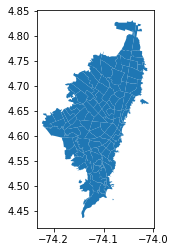

In [166]:
upz.plot()

<AxesSubplot:>

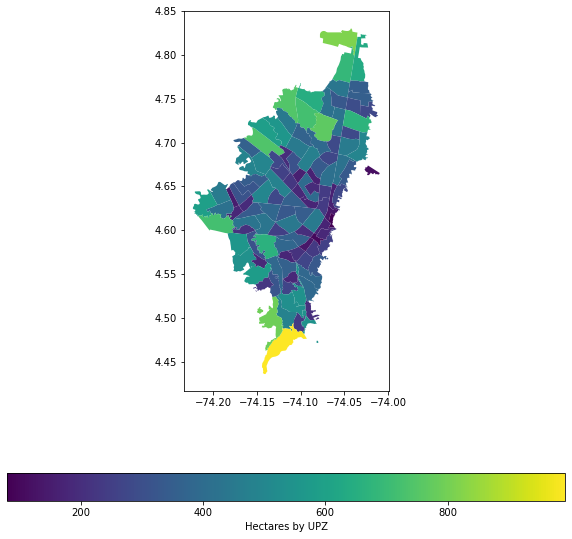

In [14]:
fig, ax = plt.subplots(1, 1,figsize=(10, 10))

upz.plot(column='HECTARES',
           ax=ax,
       legend=True,
              legend_kwds={'label': "Hectares by UPZ",
                            'orientation': "horizontal"})

## **Open streets maps API**

- [Open street maps dictionary](https://wiki.openstreetmap.org/wiki/Key:amenity)
- [Overpass](https://overpass-turbo.eu/)

In [15]:
def get_input():
    print("\nlatitud>> ")
    latitude = input()
    print("\n longitud  >> ")
    longitude = input()
    print("\nradio >> ")
    search_radius = input()
    return([latitude,longitude,search_radius])   
def get_query(user_input,clase,cosa):
    prefix = f"""[out:json][timeout:50];(node["{clase}"="{cosa}"](around:""" 
    suffix = """););out body;>;out skel qt;"""
    q = user_input[2]+','+user_input[0]+','+user_input[1]       
    built_query = prefix + q + suffix                           
    return built_query 
def sacar_data(built_query):
    api = overpy.Overpass()                       
    result = api.query(built_query)               
    list_of_node_tags = []                        
    for node in result.nodes:                     
        node.tags['latitude'] =  node.lat
        node.tags['longitude'] = node.lon
        node.tags['id'] = node.id
        list_of_node_tags.append(node.tags)
    data_frame = pd.DataFrame(list_of_node_tags)  
    return data_frame 

In [167]:
a=get_input()


latitud>> 


 4.6



 longitud  >> 


 -74.04



radio >> 


 300000


In [169]:
n=get_query(a,'amenity','restaurant')
data=sacar_data(n)
data

,amenity,created_by,name,latitude,longitude,id,diet:vegetarian,addr:street,source,cuisine,...,Direccion,comuna,editor,diet:diabetes,diet:non-vegetarian,diet:organic,diet:meat,diet:egg_free,image,diet:carvery
0,restaurant,JOSM,Casa de Piedra,4.6641184,-74.0028988,253846055,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,restaurant,NaN,La Casa de la Abuela,4.6137498,-74.0666917,262567789,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,restaurant,Potlatch 0.9a,Vegetariano Vega,4.6456017,-74.0634903,264785624,only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,restaurant,Potlatch 0.9a,Vegetariano Ajonjoli,4.6455605,-74.0636786,264785679,only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,restaurant,NaN,Desayuna Dero De La 42,4.6534938,-74.0588892,265024916,NaN,Calle 69A,Kaart Ground Survey 2017,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6614,restaurant,NaN,Sanimaki,4.5574817,-75.6606325,9081375139,NaN,NaN,NaN,japanese,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6615,restaurant,NaN,Zaragoza,5.4062263,-71.6629378,9091638919,NaN,Calle 5,NaN,burger;sandwich;regional,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6616,restaurant,NaN,La brasita,5.8883177,-71.8863561,9091661579,NaN,NaN,NaN,regional,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
6617,restaurant,NaN,NaN,4.6158015,-74.0930361,9099658074,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
data=data[['latitude','longitude']]
gdf = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.longitude, data.latitude))
gdf=gdf.set_crs(epsg=4326, inplace=True,allow_override=True)

In [172]:
bla=geopandas.sjoin( gdf, upz, how="left", op="within")

In [175]:
bla1=bla[bla['index_right'].isnull()==False]

In [20]:
numeroresupz=bla1.groupby('NOMBRE').agg({'index_right':'count'})
numeroresupz

,index_right
NOMBRE,
20 DE JULIO,21
AEROPUERTO EL DORADO,1
ALAMOS,10
ALFONSO LOPEZ,1
AMERICAS,55
...,...
USAQUEN,63
VENECIA,18
VERBENAL,36


<AxesSubplot:>

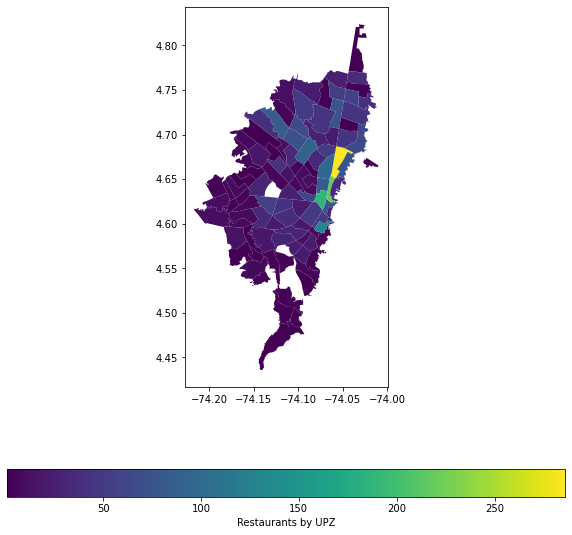

In [21]:
mapa=upz.merge(numeroresupz, left_on='NOMBRE', right_on=numeroresupz.index,how='left')
mapa=mapa[['geometry','index_right','NOMBRE']]
fig, ax = plt.subplots(1, 1,figsize=(10, 10))

mapa.plot(column='index_right',ax=ax,legend=True,
              legend_kwds={'label': "Restaurants by UPZ",
                            'orientation': "horizontal"})

- Let´s use the [properaty](https://www.properati.com.co/data) open data and turn it into a spatial data set

In [180]:
df=pd.read_csv('clase.csv.gz',compression='gzip',header=0,sep=',',quotechar='"')
df=df[['id','lat','lon']]
df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.lon, df.lat))
df=df.set_crs(epsg=4326, inplace=True)

In [182]:
datal=geopandas.sjoin( df, upz, how="left", op="within")

In [183]:
datal

,id,lat,lon,geometry,index_right,NUMERO,NOMBRE,CLASIFICAC,TIPO_UPZ,DESC_TIPO,NLOCALIDAD,LOCALIDAD,ESTRATOS,COD_ESTRAT,AREA,PERIMETER,HECTARES
0,kYkwLBzqG556hx/+Q0f3hg==,6.239000,-75.591000,POINT (-75.59100 6.23900),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KoP82kmosB1OBHf6uLWGmA==,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2yziE1GcIpc4RtAPrst6zw==,6.231514,-75.591407,POINT (-75.59141 6.23151),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IIxEwdavQqL2A4T0In2OwA==,10.482335,-73.274546,POINT (-73.27455 10.48233),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,xOoS0Gy3x+uy2owM/ZEnww==,2.487219,-76.573042,POINT (-76.57304 2.48722),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,yfLzwS1dMvw7EFoHn3argQ==,4.412793,-75.173659,POINT (-75.17366 4.41279),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999996,b0gypQcxuh6UmWQ8gVKisQ==,6.164511,-75.567559,POINT (-75.56756 6.16451),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999997,XY7ts/+Y21E49F/dzLf5Yw==,5.066503,-75.517145,POINT (-75.51714 5.06650),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999998,yBGnSWzJaXah0fCOxG3OeA==,6.167287,-75.583696,POINT (-75.58370 6.16729),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
datal.columns

Index(['id', 'lat', 'lon', 'geometry', 'index_right', 'NUMERO', 'NOMBRE',
       'CLASIFICAC', 'TIPO_UPZ', 'DESC_TIPO', 'NLOCALIDAD', 'LOCALIDAD',
       'ESTRATOS', 'COD_ESTRAT', 'AREA', 'PERIMETER', 'HECTARES'],
      dtype='object')

- Drop all the observations out of Bogotá

In [184]:
datal=datal[datal['index_right'].isnull()==False]

In [185]:
datal

,id,lat,lon,geometry,index_right,NUMERO,NOMBRE,CLASIFICAC,TIPO_UPZ,DESC_TIPO,NLOCALIDAD,LOCALIDAD,ESTRATOS,COD_ESTRAT,AREA,PERIMETER,HECTARES
10,fXZX2vOzD4oASj1iuvwtNg==,4.619384,-74.172167,POINT (-74.17217 4.61938),17.0,81.0,GRAN BRITALIA,a,1.0,RESIDENCIAL DE URBANIZACION INCOMPLETA,8.0,KENNEDY,ESTRATOS 1 Y 2,2.0,1794125.987,7670.774,179.413
11,CtL7nQV5VlIyNvcnN2ssbA==,4.508056,-74.114004,POINT (-74.11400 4.50806),28.0,57.0,GRAN YOMASA,a,1.0,RESIDENCIAL DE URBANIZACION INCOMPLETA,5.0,USME,ESTRATOS 1 Y 2,12.0,5302444.629,15860.158,530.244
30,SJ0vnIwTkRJ+UT9Jc22eZA==,4.661000,-74.076000,POINT (-74.07600 4.66100),76.0,98.0,LOS ALCAZARES,b,2.0,RESIDENCIAL CONSOLIDADO,12.0,BARRIOS UNIDOS,"ESTRATOS 3, 4, 5 Y 6",34.0,4142711.708,8825.938,414.271
64,T0I5IGIIIQFX0ALQbY3APw==,4.606996,-74.141132,POINT (-74.14113 4.60700),18.0,45.0,CARVAJAL,b,2.0,RESIDENCIAL CONSOLIDADO,8.0,KENNEDY,ESTRATOS VARIOS,23.0,4356178.389,10097.673,435.618
65,8rWu2oMOiBxKhbggqxj8bQ==,4.700478,-74.029655,POINT (-74.02965 4.70048),106.0,14.0,USAQUEN,e,5.0,CON CENTRALIDAD URBANA,1.0,USAQUEN,ESTRATOS VARIOS,123456.0,4942585.818,14760.801,494.259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999956,VjF5bjGRI9rTM9WBwCGsBQ==,4.716692,-74.067014,POINT (-74.06701 4.71669),87.0,24.0,NIZA,c,3.0,RESIDENCIAL CUALIFICADO,11.0,SUBA,"ESTRATOS 3, 4, 5 Y 6",3456.0,7648591.192,12892.332,764.859
999991,U24FFOwIoVib7SIMM9M2UA==,4.662016,-74.050147,POINT (-74.05015 4.66202),43.0,88.0,EL REFUGIO,c,3.0,RESIDENCIAL CUALIFICADO,2.0,CHAPINERO,"ESTRATOS 3, 4, 5 Y 6",56.0,3360634.089,13276.697,336.063
999992,mp3rcx42lYravbFXEadghQ==,4.718227,-74.070724,POINT (-74.07072 4.71823),87.0,24.0,NIZA,c,3.0,RESIDENCIAL CUALIFICADO,11.0,SUBA,"ESTRATOS 3, 4, 5 Y 6",3456.0,7648591.192,12892.332,764.859
999993,ZSKpF3PhtNPzc5P+oP7Egw==,4.658555,-74.053345,POINT (-74.05334 4.65855),42.0,97.0,CHICO LAGO,f,6.0,COMERCIALES,2.0,CHAPINERO,"ESTRATOS 3, 4, 5 Y 6",3456.0,4223927.797,11579.401,422.393


- How many properties does this data set has in each UPZ?

In [29]:
numeroapartamentosupz=bla1.groupby('NOMBRE').agg({'index_right':'count'})
numeroapartamentosupz

,index_right
NOMBRE,
20 DE JULIO,21
AEROPUERTO EL DORADO,1
ALAMOS,10
ALFONSO LOPEZ,1
AMERICAS,55
...,...
USAQUEN,63
VENECIA,18
VERBENAL,36


In [30]:
mapa1=upz.merge(numeroapartamentosupz, left_on='NOMBRE', right_on=numeroapartamentosupz.index,how='left')

<AxesSubplot:>

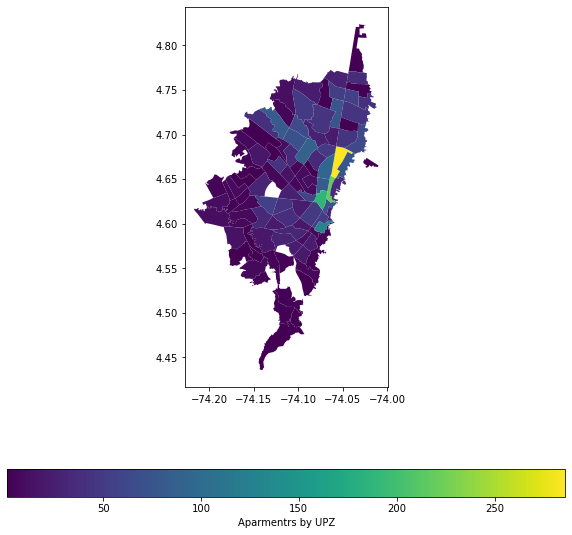

In [31]:
fig, ax = plt.subplots(1, 1,figsize=(10, 10))

mapa.plot(column='index_right',
           ax=ax,
       legend=True,
              legend_kwds={'label': "properties by UPZ",
                            'orientation': "horizontal"})

In [186]:
datal

,id,lat,lon,geometry,index_right,NUMERO,NOMBRE,CLASIFICAC,TIPO_UPZ,DESC_TIPO,NLOCALIDAD,LOCALIDAD,ESTRATOS,COD_ESTRAT,AREA,PERIMETER,HECTARES
10,fXZX2vOzD4oASj1iuvwtNg==,4.619384,-74.172167,POINT (-74.17217 4.61938),17.0,81.0,GRAN BRITALIA,a,1.0,RESIDENCIAL DE URBANIZACION INCOMPLETA,8.0,KENNEDY,ESTRATOS 1 Y 2,2.0,1794125.987,7670.774,179.413
11,CtL7nQV5VlIyNvcnN2ssbA==,4.508056,-74.114004,POINT (-74.11400 4.50806),28.0,57.0,GRAN YOMASA,a,1.0,RESIDENCIAL DE URBANIZACION INCOMPLETA,5.0,USME,ESTRATOS 1 Y 2,12.0,5302444.629,15860.158,530.244
30,SJ0vnIwTkRJ+UT9Jc22eZA==,4.661000,-74.076000,POINT (-74.07600 4.66100),76.0,98.0,LOS ALCAZARES,b,2.0,RESIDENCIAL CONSOLIDADO,12.0,BARRIOS UNIDOS,"ESTRATOS 3, 4, 5 Y 6",34.0,4142711.708,8825.938,414.271
64,T0I5IGIIIQFX0ALQbY3APw==,4.606996,-74.141132,POINT (-74.14113 4.60700),18.0,45.0,CARVAJAL,b,2.0,RESIDENCIAL CONSOLIDADO,8.0,KENNEDY,ESTRATOS VARIOS,23.0,4356178.389,10097.673,435.618
65,8rWu2oMOiBxKhbggqxj8bQ==,4.700478,-74.029655,POINT (-74.02965 4.70048),106.0,14.0,USAQUEN,e,5.0,CON CENTRALIDAD URBANA,1.0,USAQUEN,ESTRATOS VARIOS,123456.0,4942585.818,14760.801,494.259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999956,VjF5bjGRI9rTM9WBwCGsBQ==,4.716692,-74.067014,POINT (-74.06701 4.71669),87.0,24.0,NIZA,c,3.0,RESIDENCIAL CUALIFICADO,11.0,SUBA,"ESTRATOS 3, 4, 5 Y 6",3456.0,7648591.192,12892.332,764.859
999991,U24FFOwIoVib7SIMM9M2UA==,4.662016,-74.050147,POINT (-74.05015 4.66202),43.0,88.0,EL REFUGIO,c,3.0,RESIDENCIAL CUALIFICADO,2.0,CHAPINERO,"ESTRATOS 3, 4, 5 Y 6",56.0,3360634.089,13276.697,336.063
999992,mp3rcx42lYravbFXEadghQ==,4.718227,-74.070724,POINT (-74.07072 4.71823),87.0,24.0,NIZA,c,3.0,RESIDENCIAL CUALIFICADO,11.0,SUBA,"ESTRATOS 3, 4, 5 Y 6",3456.0,7648591.192,12892.332,764.859
999993,ZSKpF3PhtNPzc5P+oP7Egw==,4.658555,-74.053345,POINT (-74.05334 4.65855),42.0,97.0,CHICO LAGO,f,6.0,COMERCIALES,2.0,CHAPINERO,"ESTRATOS 3, 4, 5 Y 6",3456.0,4223927.797,11579.401,422.393


In [187]:
lat=[4.61083]
lon=[-74.070278]
colp=pd.DataFrame({'lat':lat,'lon':lon})
colp = geopandas.GeoDataFrame(colp , geometry=geopandas.points_from_xy(colp.lon, colp.lat))
colp=colp.set_crs(epsg=4326, inplace=True)
datal=datal.reset_index(drop=True)

In [189]:
colp=colp.to_crs(epsg=3310)
datal=datal.to_crs(epsg=3310)

In [190]:
datal.crs.axis_info[0].unit_name 

'metre'

In [194]:
dis=[]
for i in tqdm(datal.index):
    dis.append(colp.distance(datal['geometry'][i])[0])

100%|██████████| 158721/158721 [00:14<00:00, 11017.22it/s]


In [51]:
datal.columns

Index(['id', 'lat', 'lon', 'geometry', 'index_right', 'NUMERO', 'NOMBRE',
       'CLASIFICAC', 'TIPO_UPZ', 'DESC_TIPO', 'NLOCALIDAD', 'LOCALIDAD',
       'ESTRATOS', 'COD_ESTRAT', 'AREA', 'PERIMETER', 'HECTARES'],
      dtype='object')

In [195]:
datal=datal[['id', 'lat', 'lon', 'geometry','NOMBRE']]
datal['distancia_colp']=dis

In [197]:
gdf =gdf.to_crs(epsg=3310)

In [198]:
gdf['id']=gdf.index

In [199]:
gdf

,latitude,longitude,geometry,id
0,4.6641184,-74.0028988,POINT (5532234.706 -2181229.425),0
1,4.6137498,-74.0666917,POINT (5527472.465 -2189319.318),1
2,4.6456017,-74.0634903,POINT (5526372.644 -2186369.504),2
3,4.6455605,-74.0636786,POINT (5526353.673 -2186384.055),3
4,4.6534938,-74.0588892,POINT (5526521.706 -2185416.576),4
...,...,...,...,...
6614,4.5574817,-75.6606325,POINT (5352623.510 -2285682.166),6614
6615,5.4062263,-71.6629378,POINT (5753919.005 -1977830.686),6615
6616,5.8883177,-71.8863561,POINT (5706525.787 -1949769.589),6616
6617,4.6158015,-74.0930361,POINT (5524460.440 -2190676.832),6617


In [200]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

In [203]:
print(nearest_points(datal['geometry'][0], unary_union)[1])

POINT (5514851.806453909 -2194967.84049726)


In [204]:
nearest = gdf[gdf['geometry']==nearest_points(datal['geometry'][0], unary_union)[1]]

In [206]:
nearest['geometry'].distance(datal['geometry'][0])

2062    677.035076
dtype: float64

In [123]:
dis_restau=[]
for i in tqdm(datal.index):  
    nearest = gdf[gdf['geometry']==nearest_points(datal['geometry'][i], unary_union)[1]]
    dis_restau.append(nearest['geometry'].distance(datal['geometry'][i]))

  0%|          | 116/158721 [00:15<6:03:03,  7.28it/s]


KeyboardInterrupt: 

In [124]:
def nearest(row, geom_union, df1, df2, geom1_col='geometry', geom2_col='geometry', src_column=None):
    nearest = gdf[gdf['geometry']==nearest_points(row[geom1_col], unary_union)[1]]
    value=(nearest.distance(row[geom1_col]))
    return value

In [125]:
datal['nearest_id'] = datal.apply(nearest, geom_union=unary_union, df1=datal, df2=gdf, axis=1)

KeyboardInterrupt: 

**[Dane API](https://geoportal.dane.gov.co/geovisores/territorio/analisis-cnpv-2018/)**

In [207]:
b=datal['lon'][0]
a=datal['lat'][0]

In [208]:
result=requests.get(f'https://geoportal.dane.gov.co/laboratorio/serviciosjson/poblacion/indicadordatosgeoespacial_2_tv.php?coordx={str(b)}&coordy={str(a)}&longitud={str(100)}').json()

In [212]:
sub_data=datal[:50]

In [213]:
jsons=[]
def request(x):
    global jsons,sub_data
    b=sub_data['lon'][0]
    a=sub_data['lat'][0]
    result=requests.get(f'https://geoportal.dane.gov.co/laboratorio/serviciosjson/poblacion/indicadordatosgeoespacial_2_tv.php?coordx={str(b)}&coordy={str(a)}&longitud={str(100)}').json()
    datas={}
    datas['id']=x
    datas['info']=result['resultado']
    jsons.append(datas)

In [214]:
aa=sub_data.index.to_list()

In [215]:
pool=Pool(10)
re=pool.map(request,aa)